Ideas for further work
- Use of numpy for linear algebra
- Implement a quadratic formula
- Load external programs and run them
- class keyword etc.

# Gaussian number gen

In [1]:
import numpy.random

output_file = open("junk.dat", "w")
for i in range(100):
    y = numpy.random.normal(0.0, 1.0)
    output_file.write(str(i)+' '+str(y))

# Running external code

In [18]:
import subprocess
#Run "ls -al" in a system shell. Capture the output, redirect the error messages to output.
result = subprocess.Popen("ls -al", shell=True,stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
#At this point the command is running, possibly in parallel. Here we wait for it to finish
result.wait()
#Now fetch the output
output = result.stdout.read()
print(type(output)) #What comes out is a series of bytes. If we want string output we need to encode it
output_str = output.decode()
print(output_str)
# If you want to know if the command was successful, you can check the return value
if result.returncode != 0:
    print("The command failed with return code", result.returncode)

<class 'bytes'>
total 2376
drwxrwxr-x  4 mjki2mb2 mjki2mb2    4096 Jul  7 14:40 .
drwxr-xr-x 66 mjki2mb2 mjki2mb2    4096 Jul  7 14:12 ..
-rw-rw-r--  1 mjki2mb2 mjki2mb2    1213 Jul  6 22:47 00-Installing_python.ipynb
-rw-rw-r--  1 mjki2mb2 mjki2mb2   70304 Jul  7 12:16 01-Introduction.ipynb
-rw-rw-r--  1 mjki2mb2 mjki2mb2   16917 Jul  7 14:02 02-Variable scope (calclulating prime numbers).ipynb
-rw-rw-r--  1 mjki2mb2 mjki2mb2   27080 Jul  6 14:16 03-Calculating pi.ipynb
-rw-rw-r--  1 mjki2mb2 mjki2mb2   14581 Jul  7 07:07 04-Errors (Fantastic Exceptions and where to find them).ipynb
-rw-rw-r--  1 mjki2mb2 mjki2mb2  105996 Jul  7 07:11 05- Example, Stock analysis using pandas.ipynb
-rw-rw-r--  1 mjki2mb2 mjki2mb2  212071 Jul  7 07:58 06- Example, Molecular dynamics simulations.ipynb
-rw-rw-r--  1 mjki2mb2 mjki2mb2   17173 Jul  7 14:40 Appendix-A-Snippets.ipynb
-rw-rw-r--  1 mjki2mb2 mjki2mb2     144 Jul  7 00:26 environment.yml
drwxrwxr-x  8 mjki2mb2 mjki2mb2    4096 Jul  7 13:54 .git


# Formatted output

In [19]:
"%0.5f"%3.141592675

'3.14159'

# Histograms

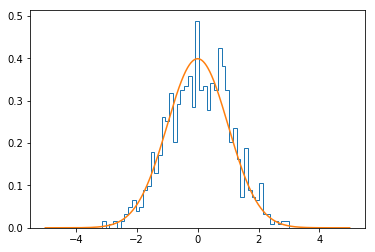

In [5]:
import numpy
import pylab

y_data = []
for i in range(1000):
    y_data.append(numpy.random.normal(0.0, 1.0))

n, bins, patches = pylab.hist(y_data, 50, normed=1, histtype='step')

x_data = numpy.arange(-5.0, 5.0, 0.01)
y_data = [numpy.exp(-0.5*x**2/(1.0*1.0))/numpy.sqrt(2.0*numpy.pi*1.0**2) for x in x_data]

pylab.plot(x_data, y_data)
pylab.show()

# Command line arguments

In [ ]:
#!/usr/bin/python
import sys
from optparse import OptionParser

# parse command line arguments
usage = "usage: %prog [options] arg"
parser = OptionParser(usage)
parser.add_option("--n", type="int", dest="nn", default=1)
(options, args) = parser.parse_args()

import numpy
import pylab

y_data = []
for i in range(options.nn):
    y_data.append(numpy.random.normal(0.0, 1.0))

n, bins, patches = pylab.hist(y_data, 50, normed=1, histtype='step')

x_data = numpy.arange(-5.0, 5.0, 0.01)
y_data = [numpy.exp(-0.5*x**2/(1.0*1.0))/numpy.sqrt(2.0*numpy.pi*1.0**2) for x in x_data]

pylab.plot(x_data, y_data)
pylab.show()

# Running other programs

In [6]:
import os
#Run the ls program
os.system("ls")

0

https://www.scipy-lectures.org/intro/scipy.html#statistics-and-random-numbers-scipy-stats

# Parsing Goodvibes data files into csv for excel

In [35]:
file = open("Goodvibes_output.dat", "r")
filetext = file.read()
filelines = filetext.split('\n')
with open('data.csv', 'w') as output:
    for line in filelines:
        if len(line) > 0 and line[0] == "o":
            cols=line.split()
            print(*(cols[1:]),sep=",",file=output)

Here we look for non-empty lines in the file, starting with a 'o'. We then split the line by whitespace (spaces, tabs, etc) and take everything but the first column `cols[1:]`.

Then we print this to the file using a trick, if you write `*list`, then python will *unpack* the list and use it as arguments to the surrounding function call.  